# Preparing the dataset for hippocampus segmentation

In this notebook you will use the skills and methods that we have talked about during our EDA Lesson to prepare the hippocampus dataset using Python. Follow the Notebook, writing snippets of code where directed so using Task comments, similar to the one below, which expects you to put the proper imports in place. Write your code directly in the cell with TASK comment. Feel free to add cells as you see fit, but please make sure that code that performs that tasked activity sits in the same cell as the Task comment.


In [48]:
# TASK: Import the following libraries that we will use: nibabel, matplotlib, numpy
import nibabel as nib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import glob
from shutil import copy2

It will help your understanding of the data a lot if you were able to use a tool that allows you to view NIFTI volumes, like [3D Slicer](https://www.slicer.org/). I will refer to Slicer throughout this Notebook and will be pasting some images showing what your output might look like.

## Loading NIFTI images using NiBabel

NiBabel is a python library for working with neuro-imaging formats (including NIFTI) that we have used in some of the exercises throughout the course. Our volumes and labels are in NIFTI format, so we will use nibabel to load and inspect them.

NiBabel documentation could be found here: https://nipy.org/nibabel/

Our dataset sits in two directories - *images* and *labels*. Each image is represented by a single file (we are fortunate to have our data converted to NIFTI) and has a corresponding label file which is named the same as the image file.

Note that our dataset is "dirty". There are a few images and labels that are not quite right. They should be quite obvious to notice, though. The dataset contains an equal amount of "correct" volumes and corresponding labels, and you don't need to alter values of any samples in order to get the clean dataset.

In [55]:
# TASK: Your data sits in directory /data/TrainingSet.
# Load an image and a segmentation mask into variables called image and label
fileset = glob.iglob('/data/TrainingSet/images/*.gz', recursive=False)
fileset = sorted(fileset)

image_name = []
nii_img_array = []
image_array = []

for file_name in fileset:
    if ('hippocampus_118.nii.gz' in file_name):
        continue
    nii_img = nib.load(file_name)
    image_name.append(file_name)
    nii_img_array.append(nii_img)
    image = nii_img.get_fdata()
    image_array.append(image)

print(len(image_array))

sample_index = 18

nii_img = nii_img_array[sample_index]
image = image_array[sample_index]
image.shape
    
#nii_img = nib.load("/data/TrainingSet/images/hippocampus_222.nii.gz")
#image = nii_img.get_fdata()
#image.shape

262


(36, 49, 40)

In [56]:
label_fileset = glob.iglob('/data/TrainingSet/labels/*.gz', recursive=False)
label_fileset = sorted(label_fileset)

label_name = []
nii_label_array = []
label_array = []

for file_name in label_fileset:
    nii_label = nib.load(file_name)
    label_name.append(file_name)
    nii_label_array.append(nii_label)
    label = nii_label.get_fdata()
    label_array.append(label)

print(len(label_array))

label = label_array[sample_index]
label.shape

#
#nii_label = nib.load("/data/TrainingSet/labels/hippocampus_222.nii.gz")
#label = nii_label.get_fdata()
#abel.shape

262


(36, 49, 40)

The file 'hippocampus_118.nii.gz' has no corresponding label so it is removed from the loaded data set and will not used.

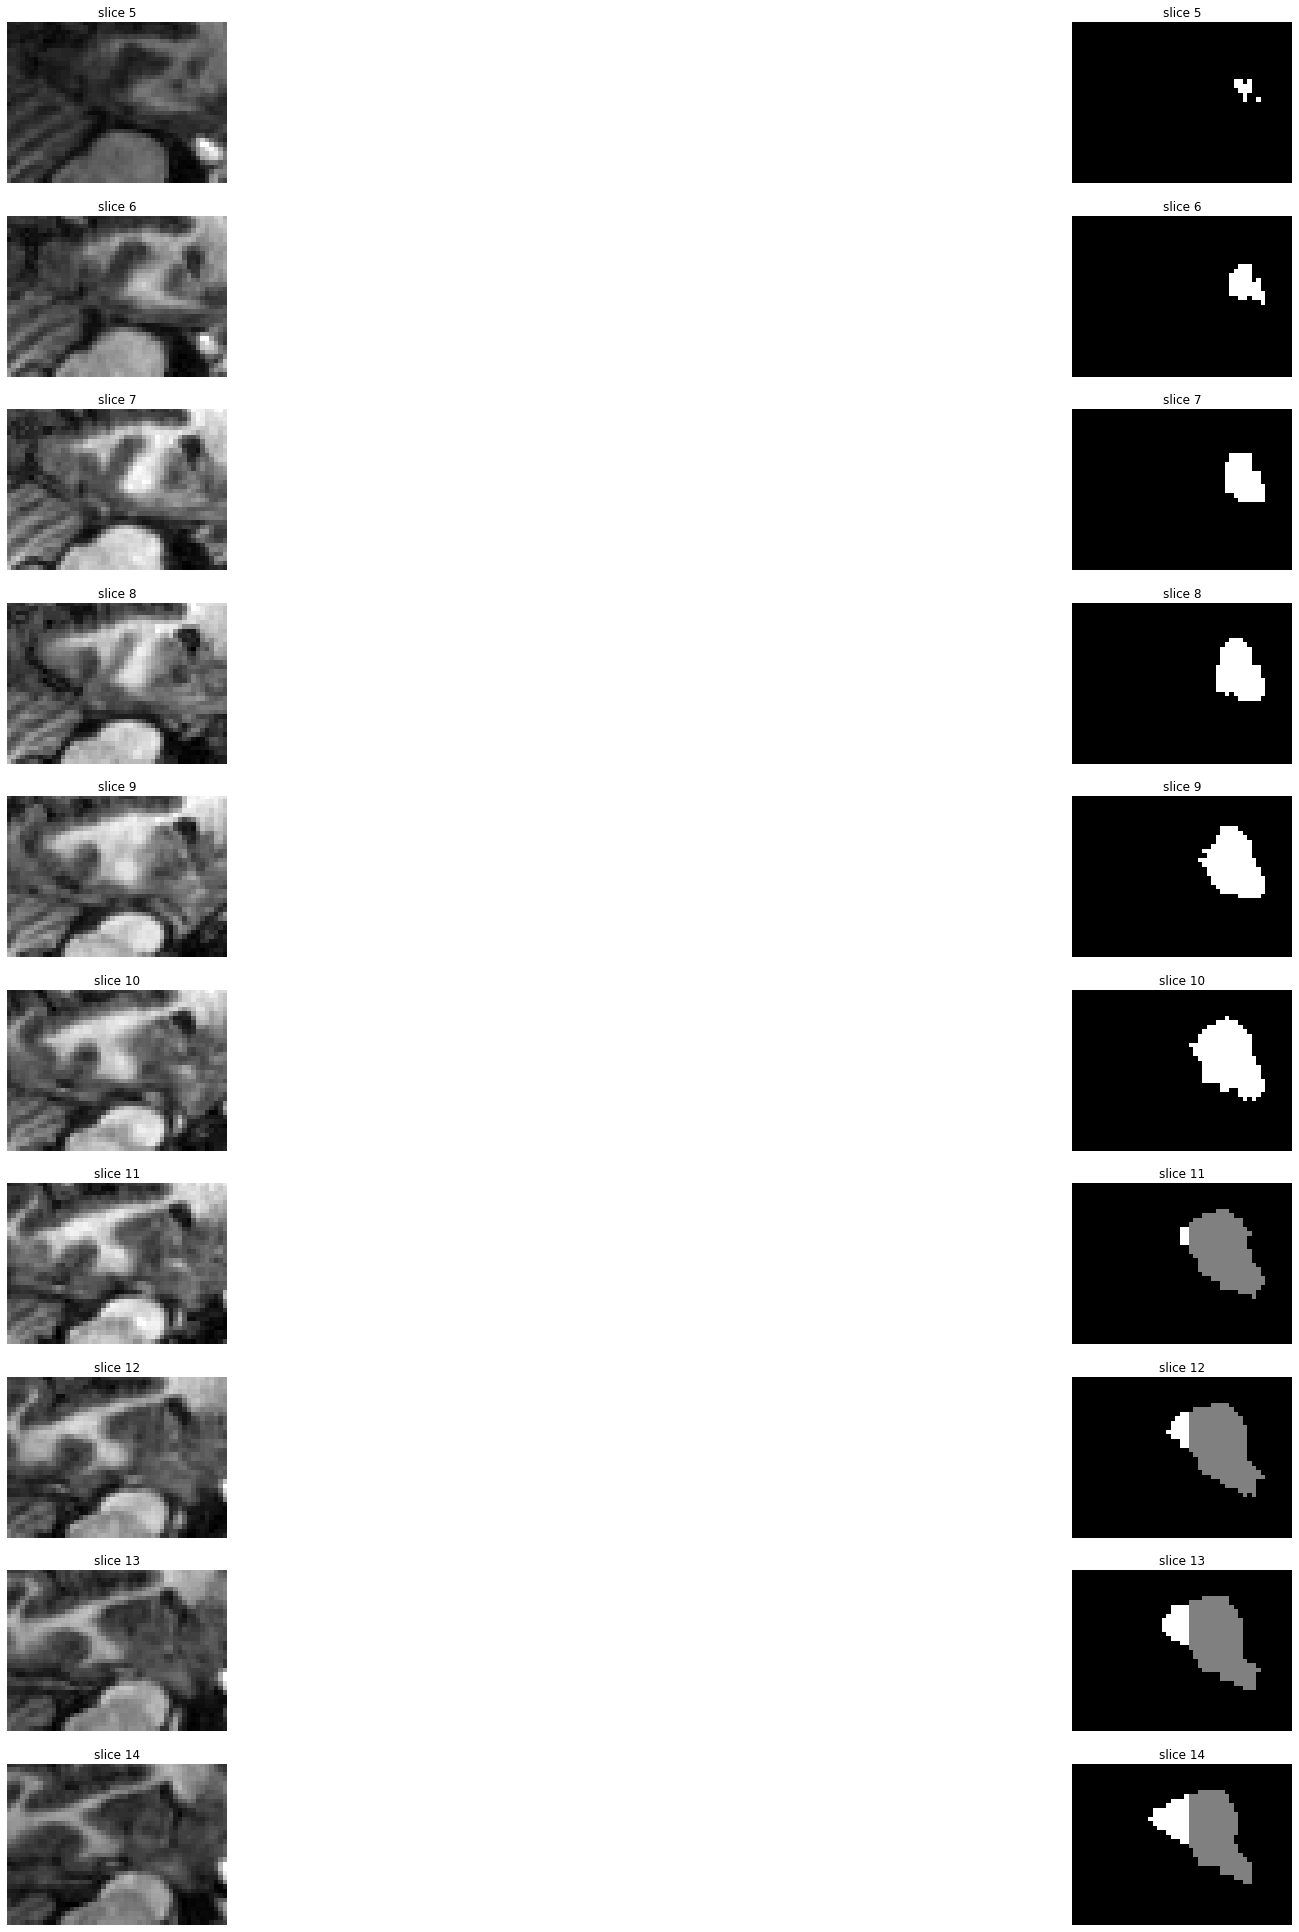

In [57]:
# Nibabel can present your image data as a Numpy array by calling the method get_fdata()
# The array will contain a multi-dimensional Numpy array with numerical values representing voxel intensities. 
# In our case, images and labels are 3-dimensional, so get_fdata will return a 3-dimensional array. You can verify this
# by accessing the .shape attribute. What are the dimensions of the input arrays?

#Dimensions are 36x49 with 40 slices

# TASK: using matplotlib, visualize a few slices from the dataset, along with their labels. 
# You can adjust plot sizes like so if you find them too small:
plt.rcParams["figure.figsize"] = (10,10)

fig, ax = plt.subplots(10, 2, figsize=[35,35])

offset = 5

for i in range(10):
    ax[i, 0].set_title(f"slice {i+offset}")
    ax[i, 0].imshow(image[:,:,i+offset], cmap='gray')
    ax[i, 0].axis("off")
    ax[i, 1].set_title(f"slice {i+offset}")
    ax[i, 1].imshow(label[:,:,i+offset], cmap='gray')
    ax[i, 1].axis("off")

plt.show()


Load volume into 3D Slicer to validate that your visualization is correct and get a feel for the shape of structures.Try to get a visualization like the one below (hint: while Slicer documentation is not particularly great, there are plenty of YouTube videos available! Just look it up on YouTube if you are not sure how to do something)

![3D slicer](img/Slicer.png)

In [58]:
# Stand out suggestion: use one of the simple Volume Rendering algorithms that we've
# implemented in one of our earlier lessons to visualize some of these volumes


## Looking at single image data
In this section we will look closer at the NIFTI representation of our volumes. In order to measure the physical volume of hippocampi, we need to understand the relationship between the sizes of our voxels and the physical world.

In [59]:
# Nibabel supports many imaging formats, NIFTI being just one of them. I told you that our images 
# are in NIFTI, but you should confirm if this is indeed the format that we are dealing with
# TASK: using .header_class attribute - what is the format of our images?

idx = 0
for nii_img in nii_img_array:
    print("index: ", idx, " ", nii_img.header)
    idx += 1

index:  0   <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 35 51 35  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'none'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 1.0
qoffset_y       : 1.0
qoffset_z       : 1.0
srow_x          : [1. 0. 0. 1.]
srow_y    

index:  98   <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 34 51 26  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'none'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 1.0
qoffset_y       : 1.0
qoffset_z       : 1.0
srow_x          : [1. 0. 0. 1.]
srow_y

index:  199   <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 38 48 40  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'none'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 1.0
qoffset_y       : 1.0
qoffset_z       : 1.0
srow_x          : [1. 0. 0. 1.]
srow_y  

All of the images are able to be loaded and have their headers inspected as NIFTI format. The image files are NIFTI format because there are no errors reading the headers.

Additionally values consistently show in the 348 bit header as making sense so it is not a case of misprocessing the header bits either.

Further down we will be inspecting .header attribute that provides access to NIFTI metadata. You can use this resource as a reference for various fields: https://brainder.org/2012/09/23/the-nifti-file-format/

In [60]:
# TASK: How many bits per pixel are used?
idx = 0
for nii_img in nii_img_array:
    print("bixpix @ index: ", idx, " ", nii_img.header["bitpix"])
    idx += 1

bixpix @ index:  0   8
bixpix @ index:  1   32
bixpix @ index:  2   32
bixpix @ index:  3   32
bixpix @ index:  4   32
bixpix @ index:  5   32
bixpix @ index:  6   32
bixpix @ index:  7   32
bixpix @ index:  8   32
bixpix @ index:  9   32
bixpix @ index:  10   32
bixpix @ index:  11   32
bixpix @ index:  12   32
bixpix @ index:  13   32
bixpix @ index:  14   32
bixpix @ index:  15   32
bixpix @ index:  16   32
bixpix @ index:  17   8
bixpix @ index:  18   8
bixpix @ index:  19   32
bixpix @ index:  20   32
bixpix @ index:  21   32
bixpix @ index:  22   32
bixpix @ index:  23   32
bixpix @ index:  24   32
bixpix @ index:  25   32
bixpix @ index:  26   32
bixpix @ index:  27   32
bixpix @ index:  28   32
bixpix @ index:  29   32
bixpix @ index:  30   32
bixpix @ index:  31   32
bixpix @ index:  32   32
bixpix @ index:  33   32
bixpix @ index:  34   32
bixpix @ index:  35   32
bixpix @ index:  36   32
bixpix @ index:  37   32
bixpix @ index:  38   32
bixpix @ index:  39   32
bixpix @ inde

There are two different bit per pixel. One set of images is 8 bit and the other set is 32 bit. Checking 3-d slicer both bitpix appear to be grayscale so checking the actual pixel values for a slice of each.

In [61]:
image_array[0].shape
image_array[1].shape

print(image_array[0])

print(image_array[1])

[[[ 42.  29.  28. ...  95. 100.  98.]
  [ 37.  30.  27. ... 101. 100.  97.]
  [ 30.  27.  27. ... 101.  99.  99.]
  ...
  [101.  93.  90. ...  28.  34.  35.]
  [ 92.  88.  84. ...  41.  39.  44.]
  [ 63.  65.  60. ...  43.  45.  54.]]

 [[ 39.  30.  33. ... 101. 101. 100.]
  [ 38.  30.  31. ... 103. 100. 101.]
  [ 42.  29.  28. ... 103. 106. 100.]
  ...
  [100. 100. 102. ...  22.  33.  36.]
  [ 98.  99. 105. ...  26.  36.  41.]
  [ 91.  90.  90. ...  29.  38.  44.]]

 [[ 43.  35.  38. ... 110. 110.  98.]
  [ 49.  35.  36. ... 105. 106. 100.]
  [ 43.  30.  34. ... 102. 105.  99.]
  ...
  [ 67.  84.  96. ...  17.  27.  35.]
  [ 81.  94.  93. ...  14.  29.  37.]
  [ 98. 102.  97. ...  28.  30.  36.]]

 ...

 [[ 82.  81.  79. ...   8.  12.  18.]
  [ 84.  78.  81. ...   9.  12.  16.]
  [ 81.  81.  81. ...  12.  20.  34.]
  ...
  [ 47.  45.  47. ...  50.  37.  32.]
  [ 38.  36.  37. ...  50.  44.  41.]
  [ 46.  47.  40. ...  52.  50.  51.]]

 [[ 91.  89.  87. ...   7.   5.   6.]
  [ 91.  90.

The 8 bit data appears to be in grayscale [0..255] range. The 32 bit values are floating point and appear to be in houndsfield units. The data will need to be normalized before performing model training.

In [62]:
# TASK: What are the units of measurement?

idx = 0
for nii_img in nii_img_array:
    print("xyzt_units @ index: ", idx, " {0:08b}".format(nii_img.header["xyzt_units"]))
    idx += 1

xyzt_units @ index:  0  00001010
xyzt_units @ index:  1  00001010
xyzt_units @ index:  2  00001010
xyzt_units @ index:  3  00001010
xyzt_units @ index:  4  00001010
xyzt_units @ index:  5  00001010
xyzt_units @ index:  6  00001010
xyzt_units @ index:  7  00001010
xyzt_units @ index:  8  00001010
xyzt_units @ index:  9  00001010
xyzt_units @ index:  10  00001010
xyzt_units @ index:  11  00001010
xyzt_units @ index:  12  00001010
xyzt_units @ index:  13  00001010
xyzt_units @ index:  14  00001010
xyzt_units @ index:  15  00001010
xyzt_units @ index:  16  00001010
xyzt_units @ index:  17  00001010
xyzt_units @ index:  18  00001010
xyzt_units @ index:  19  00001010
xyzt_units @ index:  20  00001010
xyzt_units @ index:  21  00001010
xyzt_units @ index:  22  00001010
xyzt_units @ index:  23  00001010
xyzt_units @ index:  24  00001010
xyzt_units @ index:  25  00001010
xyzt_units @ index:  26  00001010
xyzt_units @ index:  27  00001010
xyzt_units @ index:  28  00001010
xyzt_units @ index:  29 

All the xyzt_units are set to a value of 10 (base10) or 00001010 in binary. Per the [NIFTI xyzt_units spec](https://nifti.nimh.nih.gov/nifti-1/documentation/nifti1fields/nifti1fields_pages/xyzt_units.html) the xyz units are in millimeters (second bit set) and the time dimension is in seconds (fourth bit sit).

In [64]:
# TASK: Do we have a regular grid? What are grid spacings?

idx = 0
for nii_img in nii_img_array:
    print("index: ", idx, " ", nii_img.header["pixdim"])
    idx += 1
    
print("Potential odd file: ", image_name[6])
print("Potential odd file: ", image_name[179])

index:  0   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  1   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  2   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  3   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  4   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  5   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  6   [-1.        0.597656  0.597656  1.25      0.        0.        0.
  0.      ]
index:  7   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  8   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  9   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  10   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  11   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  12   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  13   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  14   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  15   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  16   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  17   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  18   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  19   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  20   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  21   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  22   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  23   [1. 1. 1. 1. 1. 0. 0. 0.]
index:  24   [1. 1. 1. 

Two images have different pixel dimensions. These are suspect of not being the right image types and should be examined further.
Image 6, 179 corresponding to files: hippocampus_010.nii.gz and hippocampus_281.nii.gz

Taking out of consideration the two different files, the grid spacings are regular at 1 mm for each dimension as defined in pixdim[1] through pixdim[3]. Pixdim[0] is part of a rotation matrix and is generally -1 or any other value is interpreted as 1. This is not necessary for this analysis other than to note pixdim[0] is 1. pixdim[4] indicates the scaling of the time element which is 1.

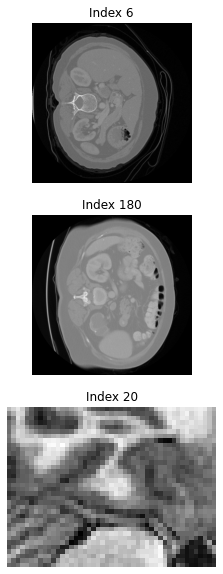

In [65]:
fig, ax = plt.subplots(3, 1, figsize=[10,10])

ax[0].set_title(f"Index 6")
ax[0].imshow(image_array[6][:,:,10], cmap='gray')
ax[0].axis("off")
ax[1].set_title(f"Index 180")
ax[1].imshow(image_array[179][:,:,10], cmap='gray')
ax[1].axis("off")
ax[2].set_title(f"Index 20")
ax[2].imshow(image_array[20][:,:,10], cmap='gray')
ax[2].axis("off")

plt.show()

We can definitely see here we're looking at two abdominal axial views that got into our data set and should be removed.

In [66]:
# TASK: What dimensions represent axial, sagittal, and coronal slices? How do you know?

idx = 0
for image in image_array:
    print("index: ", idx, ' {}'.format(image.shape))
    idx += 1

index:  0  (35, 51, 35)
index:  1  (34, 52, 35)
index:  2  (36, 52, 38)
index:  3  (35, 52, 34)
index:  4  (34, 47, 40)
index:  5  (36, 48, 40)
index:  6  (512, 512, 241)
index:  7  (36, 50, 31)
index:  8  (39, 50, 40)
index:  9  (42, 51, 28)
index:  10  (35, 48, 32)
index:  11  (36, 47, 41)
index:  12  (36, 46, 43)
index:  13  (35, 51, 35)
index:  14  (38, 52, 33)
index:  15  (35, 48, 35)
index:  16  (36, 50, 36)
index:  17  (33, 48, 38)
index:  18  (36, 49, 40)
index:  19  (35, 47, 37)
index:  20  (36, 47, 39)
index:  21  (34, 51, 32)
index:  22  (37, 51, 35)
index:  23  (34, 53, 34)
index:  24  (36, 52, 37)
index:  25  (36, 51, 34)
index:  26  (37, 52, 34)
index:  27  (38, 48, 33)
index:  28  (36, 48, 37)
index:  29  (36, 49, 38)
index:  30  (38, 52, 29)
index:  31  (35, 51, 36)
index:  32  (38, 49, 38)
index:  33  (33, 54, 39)
index:  34  (34, 52, 40)
index:  35  (37, 51, 35)
index:  36  (41, 47, 42)
index:  37  (35, 51, 34)
index:  38  (34, 53, 36)
index:  39  (39, 52, 31)
index: 

We know that axial is a slice of the z plane, coronal is a slice of the x plane, and sagittal is a slice of the y plane. By the NIFTI format the voxels are defined x, y, z as well as the axes.

Removing the two suspect images.. we generally have images that have about (36, 50) planes (x,y) and about 36 slices. Each image is slightly variable as would be suspected given the millimeter narrowed range of these images.

In [67]:
#### By now you should have enough information to decide what are dimensions of a single voxel
# TASK: Compute the volume (in mm³) of a hippocampus using one of the labels you've loaded. 
# You should get a number between ~2200 and ~4500

volumes = []

idx = 0
for label_image in label_array:
    label_image_temp = label_image.copy()
    label_image_temp[label_image_temp >= 1] = 1
    vol = np.sum(label_image_temp)
    volumes.append(vol)
    print("index: ", idx, 'volume {}'.format(vol))
    if (vol < 2200 or vol > 4500):
        print('Index: ', idx, 'CHECK If too large or small.')
    idx += 1

index:  0 volume 2948.0
index:  1 volume 3353.0
index:  2 volume 3698.0
index:  3 volume 4263.0
index:  4 volume 3372.0
index:  5 volume 3248.0
index:  6 volume 3456.0
index:  7 volume 3456.0
index:  8 volume 3622.0
index:  9 volume 2819.0
index:  10 volume 3478.0
index:  11 volume 3356.0
index:  12 volume 3611.0
index:  13 volume 3568.0
index:  14 volume 4030.0
index:  15 volume 3326.0
index:  16 volume 3628.0
index:  17 volume 3423.0
index:  18 volume 3375.0
index:  19 volume 3450.0
index:  20 volume 3509.0
index:  21 volume 3195.0
index:  22 volume 3558.0
index:  23 volume 3658.0
index:  24 volume 3445.0
index:  25 volume 3763.0
index:  26 volume 3847.0
index:  27 volume 3220.0
index:  28 volume 2868.0
index:  29 volume 3292.0
index:  30 volume 3272.0
index:  31 volume 3728.0
index:  32 volume 3831.0
index:  33 volume 3109.0
index:  34 volume 3361.0
index:  35 volume 3519.0
index:  36 volume 3733.0
index:  37 volume 2773.0
index:  38 volume 3127.0
index:  39 volume 3409.0
index:  40

In [68]:
print("Potential bad file. Index 179 ", image_name[179])

Potential bad file. Index 179  /data/TrainingSet/images/hippocampus_281.nii.gz


## Plotting some charts

In [69]:
# TASK: Plot a histogram of all volumes that we have in our dataset and see how 
# our dataset measures against a slice of a normal population represented by the chart below.

<img src="img/nomogram_fem_right.svg" width=400 align=left>

Do you see any outliers? Why do you think it's so (might be not immediately obvious, but it's always a good idea to inspect) outliers closer. If you haven't found the images that do not belong, the histogram may help you.

In the real world we would have precise information about the ages and conditions of our patients, and understanding how our dataset measures against population norm would be the integral part of clinical validation that we talked about in last lesson. Unfortunately, we do not have this information about this dataset, so we can only guess why it measures the way it is. If you would like to explore further, you can use the [calculator from HippoFit project](http://www.smanohar.com/biobank/calculator.html) to see how our dataset compares against different population slices

Did you notice anything odd about the label files? We hope you did! The mask seems to have two classes, labeled with values `1` and `2` respectively. If you visualized sagittal or axial views, you might have gotten a good guess of what those are. Class 1 is the anterior segment of the hippocampus and class 2 is the posterior one. 

For the purpose of volume calculation we do not care about the distinction, however we will still train our network to differentiate between these two classes and the background

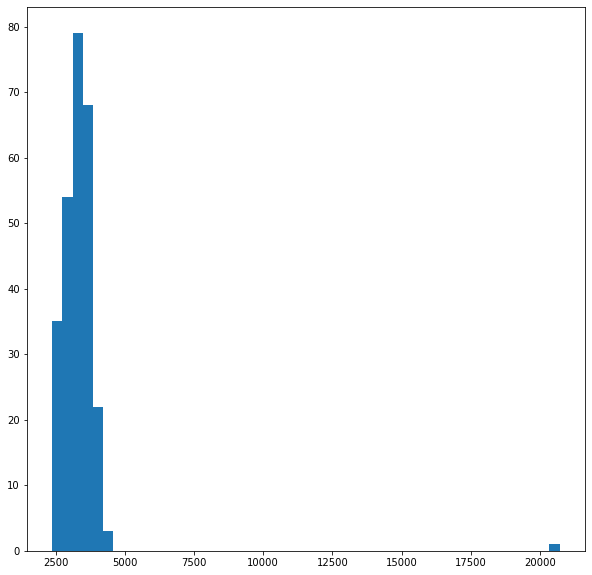

In [70]:
plt.hist(volumes, 50)
plt.show()

In [75]:
# TASK: Copy the clean dataset to the output folder inside section1/out. You will use it in the next Section
input_image_folder = '/data/TrainingSet/images'
input_label_folder = '/data/TrainingSet/labels'


output_image_folder = '/home/workspace/out/images'
output_label_folder = '/home/workspace/out/labels'

#print(len(image_name))
#print(len(label_name))

do_not_copy_indexes = [6,179]
count = 0

for idx in range(len(nii_img_array)):
    if not (idx in do_not_copy_indexes):
        #print(image_name[idx])
        #print(label_name[idx])
        copy2(image_name[idx], output_image_folder)
        copy2(label_name[idx], output_label_folder)
        count += 1

print('Copied ', count, ' images and ', count, ' labels.')

Copied  260  images and  260  labels.


We've identified that we had two axial abdominal views,  and one image that has a hippocampus size well outside of expected range. These were filtered from the dataset.

## Final remarks

Congratulations! You have finished Section 1. 

In this section you have inspected a dataset of MRI scans and related segmentations, represented as NIFTI files. We have visualized some slices, and understood the layout of the data. We have inspected file headers to understand what how the image dimensions relate to the physical world and we have understood how to measure our volume. We have then inspected dataset for outliers, and have created a clean set that is ready for consumption by our ML algorithm. 

In the next section you will create training and testing pipelines for a UNet-based machine learning model, run and monitor the execution, and will produce test metrics. This will arm you with all you need to use the model in the clinical context and reason about its performance!